In [22]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from imblearn.over_sampling import KMeansSMOTE, SMOTE
from sklearn.model_selection import StratifiedKFold

In [23]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle



In [24]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

test_split = 0.1 #portion of data used for testing
 #portion of training data used for validation
    
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [25]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [26]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (379086, 30)
After OverSampling, the shape of train_y: (379086,) 

After OverSampling, counts of label '1': 189543
After OverSampling, counts of label '0': 189543
After OverSampling, the shape of train_X: (379086, 30)
After OverSampling, the shape of train_y: (379086,) 

After OverSampling, counts of label '1': 189543
After OverSampling, counts of label '0': 189543
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 27)           837         input_3[0][0]                    
______________________________________________________________________________

379086/379086 [==============================] - 22s 59us/step - loss: 15.7902 - rec_loss: 25.1645 - kl_loss: 4.4912 - val_loss: 14.4411 - val_rec_loss: 25.3286 - val_kl_loss: 2.6384
Epoch 16/150
379086/379086 [==============================] - 23s 59us/step - loss: 15.7497 - rec_loss: 25.0843 - kl_loss: 4.5249 - val_loss: 14.5210 - val_rec_loss: 25.4604 - val_kl_loss: 2.7179
Epoch 17/150
379086/379086 [==============================] - 22s 59us/step - loss: 15.6039 - rec_loss: 24.8272 - kl_loss: 4.5382 - val_loss: 13.9933 - val_rec_loss: 24.4186 - val_kl_loss: 2.7563
Epoch 18/150
379086/379086 [==============================] - 22s 58us/step - loss: 15.5208 - rec_loss: 24.7005 - kl_loss: 4.5566 - val_loss: 13.9415 - val_rec_loss: 24.2825 - val_kl_loss: 2.8142
Epoch 19/150
379086/379086 [==============================] - 22s 58us/step - loss: 15.4001 - rec_loss: 24.5029 - kl_loss: 4.5659 - val_loss: 14.1402 - val_rec_loss: 24.7304 - val_kl_loss: 2.7912
Epoch 20/150
379086/379086 [=====

Epoch 57/150
379086/379086 [==============================] - 22s 58us/step - loss: 14.1390 - rec_loss: 22.1983 - kl_loss: 4.7137 - val_loss: 12.9546 - val_rec_loss: 22.3063 - val_kl_loss: 3.0426
Epoch 58/150
379086/379086 [==============================] - 22s 58us/step - loss: 14.1744 - rec_loss: 22.2651 - kl_loss: 4.7225 - val_loss: 13.0446 - val_rec_loss: 22.5149 - val_kl_loss: 3.0190
Epoch 59/150
379086/379086 [==============================] - 22s 57us/step - loss: 14.2020 - rec_loss: 22.3384 - kl_loss: 4.7165 - val_loss: 12.9418 - val_rec_loss: 22.2529 - val_kl_loss: 3.0710
Epoch 60/150
379086/379086 [==============================] - 22s 57us/step - loss: 14.0758 - rec_loss: 22.0805 - kl_loss: 4.7178 - val_loss: 13.2524 - val_rec_loss: 22.8652 - val_kl_loss: 3.0769
Epoch 61/150
379086/379086 [==============================] - 22s 58us/step - loss: 14.0921 - rec_loss: 22.1217 - kl_loss: 4.7232 - val_loss: 13.1199 - val_rec_loss: 22.6559 - val_kl_loss: 3.0323
Epoch 62/150
379086/

379086/379086 [==============================] - 23s 60us/step - loss: 13.7678 - rec_loss: 21.6203 - kl_loss: 4.6749 - val_loss: 13.0779 - val_rec_loss: 22.7970 - val_kl_loss: 2.8227
Epoch 99/150
379086/379086 [==============================] - 23s 60us/step - loss: 13.7700 - rec_loss: 21.6300 - kl_loss: 4.6733 - val_loss: 12.9858 - val_rec_loss: 22.4749 - val_kl_loss: 2.9592
Epoch 100/150
379086/379086 [==============================] - 23s 59us/step - loss: 13.7038 - rec_loss: 21.5024 - kl_loss: 4.6615 - val_loss: 12.9797 - val_rec_loss: 22.3323 - val_kl_loss: 3.0782
Epoch 101/150
379086/379086 [==============================] - 22s 59us/step - loss: 13.7129 - rec_loss: 21.5304 - kl_loss: 4.6634 - val_loss: 13.0142 - val_rec_loss: 22.5317 - val_kl_loss: 2.9688
Epoch 102/150
379086/379086 [==============================] - 23s 60us/step - loss: 13.7675 - rec_loss: 21.6280 - kl_loss: 4.6704 - val_loss: 12.8858 - val_rec_loss: 22.2200 - val_kl_loss: 3.0330
Epoch 103/150
379086/379086 [=

Epoch 140/150
379086/379086 [==============================] - 23s 60us/step - loss: 13.5948 - rec_loss: 21.3047 - kl_loss: 4.6703 - val_loss: 13.1839 - val_rec_loss: 22.7006 - val_kl_loss: 3.1493
Epoch 141/150
379086/379086 [==============================] - 23s 59us/step - loss: 13.5062 - rec_loss: 21.1240 - kl_loss: 4.6803 - val_loss: 12.8968 - val_rec_loss: 22.1068 - val_kl_loss: 3.1472
Epoch 142/150
379086/379086 [==============================] - 22s 59us/step - loss: 13.6210 - rec_loss: 21.3473 - kl_loss: 4.6812 - val_loss: 12.6206 - val_rec_loss: 21.6991 - val_kl_loss: 3.0300
Epoch 143/150
379086/379086 [==============================] - 22s 59us/step - loss: 13.6301 - rec_loss: 21.3676 - kl_loss: 4.6725 - val_loss: 12.8433 - val_rec_loss: 22.1742 - val_kl_loss: 2.9900
Epoch 144/150
379086/379086 [==============================] - 23s 60us/step - loss: 13.7097 - rec_loss: 21.5064 - kl_loss: 4.6876 - val_loss: 12.9535 - val_rec_loss: 22.4025 - val_kl_loss: 2.9792
Epoch 145/150
3

379086/379086 [==============================] - 77s 204us/step - loss: 0.1642 - accuracy: 0.9331 - val_loss: 0.1161 - val_accuracy: 0.9682
Epoch 41/50
379086/379086 [==============================] - 77s 203us/step - loss: 0.1642 - accuracy: 0.9330 - val_loss: 0.1231 - val_accuracy: 0.9660
Epoch 42/50
379086/379086 [==============================] - 77s 203us/step - loss: 0.1637 - accuracy: 0.9331 - val_loss: 0.1191 - val_accuracy: 0.9680
Epoch 43/50
379086/379086 [==============================] - 78s 205us/step - loss: 0.1642 - accuracy: 0.9334 - val_loss: 0.1221 - val_accuracy: 0.9680
Epoch 44/50
379086/379086 [==============================] - 78s 205us/step - loss: 0.1639 - accuracy: 0.9334 - val_loss: 0.1151 - val_accuracy: 0.9702
Epoch 45/50
379086/379086 [==============================] - 78s 205us/step - loss: 0.1644 - accuracy: 0.9329 - val_loss: 0.1246 - val_accuracy: 0.9679
Epoch 46/50
379086/379086 [==============================] - 77s 204us/step - loss: 0.1640 - accurac

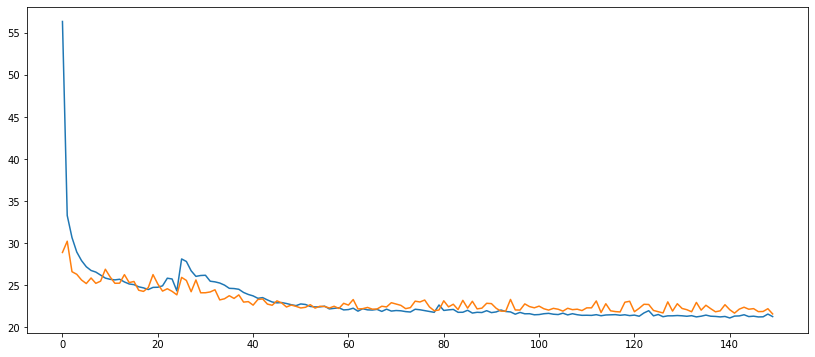

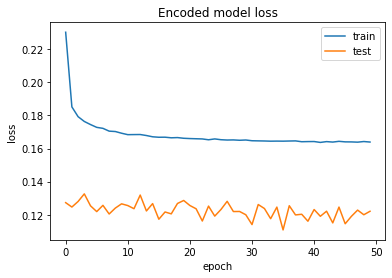

Overall accuracy of Convolutional Neural Network model: 0.9673569562652734


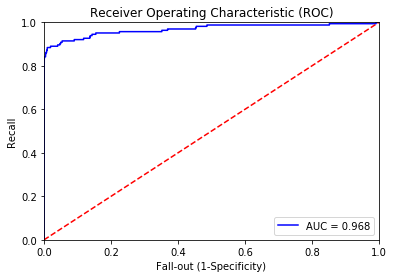

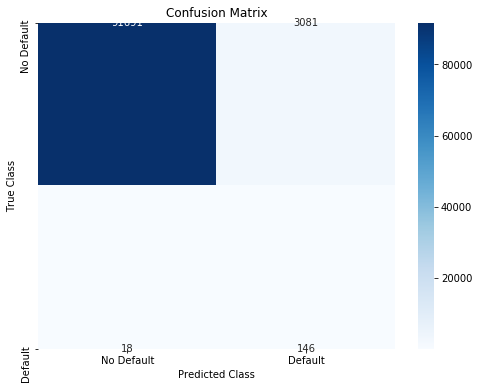

AUC(ROC): 0.9288671502234374
Precision: 0.04524325999380229
Recall: 0.8902439024390244
F1 score: 0.0861102919492775
False positives: 3081
True positives: 146
False negatives: 18
True negatives: 91691
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (379086, 30)
After OverSampling, the shape of train_y: (379086,) 

After OverSampling, counts of label '1': 189543
After OverSampling, counts of label '0': 189543
After OverSampling, the shape of train_X: (379086, 30)
After OverSampling, the shape of train_y: (379086,) 

After OverSampling, counts of label '1': 189543
After OverSampling, counts of label '0': 189543
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 27)           837         input_5[0][0]                    
______________________________________________________________________________

379086/379086 [==============================] - 21s 57us/step - loss: 15.5456 - rec_loss: 24.7310 - kl_loss: 4.4039 - val_loss: 13.9790 - val_rec_loss: 24.2755 - val_kl_loss: 2.8626
Epoch 16/150
379086/379086 [==============================] - 21s 56us/step - loss: 15.4302 - rec_loss: 24.5322 - kl_loss: 4.4014 - val_loss: 14.2253 - val_rec_loss: 24.9539 - val_kl_loss: 2.6980
Epoch 17/150
379086/379086 [==============================] - 21s 55us/step - loss: 15.3767 - rec_loss: 24.4419 - kl_loss: 4.4045 - val_loss: 13.7452 - val_rec_loss: 24.0148 - val_kl_loss: 2.6931
Epoch 18/150
379086/379086 [==============================] - 21s 56us/step - loss: 15.2807 - rec_loss: 24.2436 - kl_loss: 4.4270 - val_loss: 13.6427 - val_rec_loss: 23.6910 - val_kl_loss: 2.8238
Epoch 19/150
379086/379086 [==============================] - 21s 57us/step - loss: 15.1847 - rec_loss: 24.0561 - kl_loss: 4.4389 - val_loss: 14.0151 - val_rec_loss: 24.4998 - val_kl_loss: 2.7699
Epoch 20/150
379086/379086 [=====

Epoch 57/150
379086/379086 [==============================] - 21s 55us/step - loss: 14.2527 - rec_loss: 22.4995 - kl_loss: 4.5762 - val_loss: 13.1410 - val_rec_loss: 22.7430 - val_kl_loss: 2.8819
Epoch 58/150
379086/379086 [==============================] - 20s 53us/step - loss: 14.2743 - rec_loss: 22.5292 - kl_loss: 4.5799 - val_loss: 13.6688 - val_rec_loss: 23.6531 - val_kl_loss: 3.0046
Epoch 59/150
379086/379086 [==============================] - 20s 53us/step - loss: 14.2751 - rec_loss: 22.5327 - kl_loss: 4.5846 - val_loss: 13.1301 - val_rec_loss: 22.5465 - val_kl_loss: 3.0519
Epoch 60/150
379086/379086 [==============================] - 20s 53us/step - loss: 14.2780 - rec_loss: 22.5292 - kl_loss: 4.5969 - val_loss: 13.3555 - val_rec_loss: 23.1258 - val_kl_loss: 2.9232
Epoch 61/150
379086/379086 [==============================] - 20s 52us/step - loss: 14.1779 - rec_loss: 22.3471 - kl_loss: 4.5781 - val_loss: 13.3096 - val_rec_loss: 22.9093 - val_kl_loss: 3.0243
Epoch 62/150
379086/

Epoch 99/150
379086/379086 [==============================] - 20s 52us/step - loss: 13.9968 - rec_loss: 22.0273 - kl_loss: 4.6267 - val_loss: 13.0357 - val_rec_loss: 22.3190 - val_kl_loss: 3.1110
Epoch 100/150
379086/379086 [==============================] - 20s 52us/step - loss: 14.0291 - rec_loss: 22.1257 - kl_loss: 4.6021 - val_loss: 13.3394 - val_rec_loss: 23.0518 - val_kl_loss: 2.9949
Epoch 101/150
379086/379086 [==============================] - 20s 52us/step - loss: 14.0762 - rec_loss: 22.1915 - kl_loss: 4.6235 - val_loss: 13.0160 - val_rec_loss: 22.3999 - val_kl_loss: 2.9925
Epoch 102/150
379086/379086 [==============================] - 20s 52us/step - loss: 14.0693 - rec_loss: 22.1702 - kl_loss: 4.6275 - val_loss: 12.9526 - val_rec_loss: 22.1561 - val_kl_loss: 3.1047
Epoch 103/150
379086/379086 [==============================] - 20s 52us/step - loss: 14.0362 - rec_loss: 22.1088 - kl_loss: 4.6157 - val_loss: 13.2410 - val_rec_loss: 22.7803 - val_kl_loss: 3.0453
Epoch 104/150
37

379086/379086 [==============================] - 20s 52us/step - loss: 13.9711 - rec_loss: 21.9744 - kl_loss: 4.6684 - val_loss: 13.1654 - val_rec_loss: 22.7573 - val_kl_loss: 2.8957
Epoch 141/150
379086/379086 [==============================] - 20s 52us/step - loss: 14.0670 - rec_loss: 22.1418 - kl_loss: 4.6591 - val_loss: 12.9340 - val_rec_loss: 22.1088 - val_kl_loss: 3.0850
Epoch 142/150
379086/379086 [==============================] - 20s 52us/step - loss: 13.9215 - rec_loss: 21.8519 - kl_loss: 4.6672 - val_loss: 12.9922 - val_rec_loss: 22.2871 - val_kl_loss: 3.0312
Epoch 143/150
379086/379086 [==============================] - 20s 52us/step - loss: 13.9431 - rec_loss: 21.9234 - kl_loss: 4.6633 - val_loss: 13.1400 - val_rec_loss: 22.5524 - val_kl_loss: 3.0611
Epoch 144/150
379086/379086 [==============================] - 20s 52us/step - loss: 13.8873 - rec_loss: 21.8138 - kl_loss: 4.6589 - val_loss: 13.9874 - val_rec_loss: 24.2334 - val_kl_loss: 3.0945
Epoch 145/150
379086/379086 [

379086/379086 [==============================] - 74s 195us/step - loss: 0.1761 - accuracy: 0.9333 - val_loss: 0.1353 - val_accuracy: 0.9748
Epoch 41/50
379086/379086 [==============================] - 73s 194us/step - loss: 0.1760 - accuracy: 0.9332 - val_loss: 0.1300 - val_accuracy: 0.9792
Epoch 42/50
379086/379086 [==============================] - 69s 183us/step - loss: 0.1760 - accuracy: 0.9332 - val_loss: 0.1259 - val_accuracy: 0.9754
Epoch 43/50
379086/379086 [==============================] - 71s 188us/step - loss: 0.1763 - accuracy: 0.9333 - val_loss: 0.1371 - val_accuracy: 0.9732
Epoch 44/50
379086/379086 [==============================] - 73s 193us/step - loss: 0.1759 - accuracy: 0.9333 - val_loss: 0.1270 - val_accuracy: 0.9771
Epoch 45/50
379086/379086 [==============================] - 76s 201us/step - loss: 0.1760 - accuracy: 0.9333 - val_loss: 0.1381 - val_accuracy: 0.9738
Epoch 46/50
379086/379086 [==============================] - 78s 206us/step - loss: 0.1762 - accurac

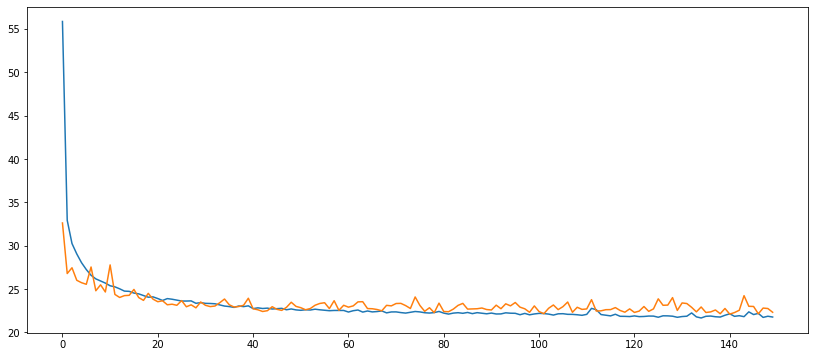

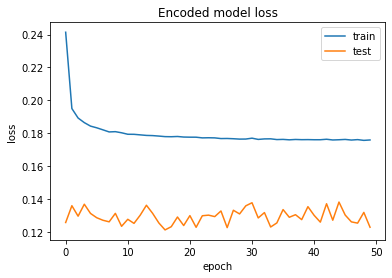

Overall accuracy of Convolutional Neural Network model: 0.9809766579590461


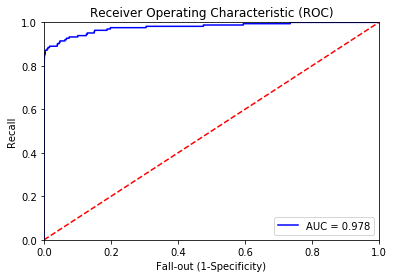

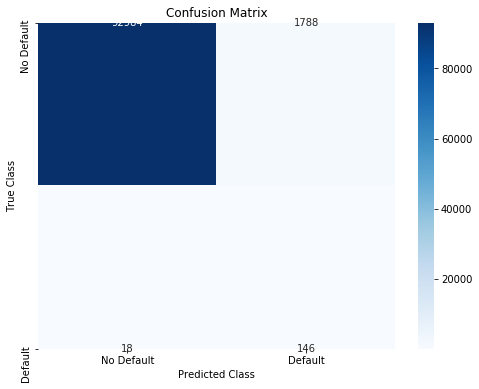

AUC(ROC): 0.9356887853055291
Precision: 0.07549120992761117
Recall: 0.8902439024390244
F1 score: 0.1391801715919924
False positives: 1788
True positives: 146
False negatives: 18
True negatives: 92984
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (379088, 30)
After OverSampling, the shape of train_y: (379088,) 

After OverSampling, counts of label '1': 189544
After OverSampling, counts of label '0': 189544
After OverSampling, the shape of train_X: (379088, 30)
After OverSampling, the shape of train_y: (379088,) 

After OverSampling, counts of label '1': 189544
After OverSampling, counts of label '0': 189544
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_33 (Dense)                (None, 27)           837         input_7[0][0]                    
______________________________________________________________________________

379088/379088 [==============================] - 22s 59us/step - loss: 15.2594 - rec_loss: 24.5032 - kl_loss: 4.4563 - val_loss: 13.5980 - val_rec_loss: 23.7079 - val_kl_loss: 2.8275
Epoch 16/150
379088/379088 [==============================] - 22s 58us/step - loss: 15.2483 - rec_loss: 24.4983 - kl_loss: 4.4589 - val_loss: 13.7379 - val_rec_loss: 23.8946 - val_kl_loss: 2.9234
Epoch 17/150
379088/379088 [==============================] - 22s 58us/step - loss: 15.1845 - rec_loss: 24.3635 - kl_loss: 4.4924 - val_loss: 13.7685 - val_rec_loss: 23.9304 - val_kl_loss: 2.9628
Epoch 18/150
379088/379088 [==============================] - 22s 58us/step - loss: 15.1871 - rec_loss: 24.3508 - kl_loss: 4.5086 - val_loss: 13.4171 - val_rec_loss: 23.1867 - val_kl_loss: 2.9745
Epoch 19/150
379088/379088 [==============================] - 22s 58us/step - loss: 15.2352 - rec_loss: 24.4435 - kl_loss: 4.5157 - val_loss: 13.5447 - val_rec_loss: 23.3841 - val_kl_loss: 3.0571
Epoch 20/150
379088/379088 [=====

Epoch 57/150
379088/379088 [==============================] - 22s 58us/step - loss: 14.2652 - rec_loss: 22.6591 - kl_loss: 4.6245 - val_loss: 12.8604 - val_rec_loss: 22.0427 - val_kl_loss: 3.0936
Epoch 58/150
379088/379088 [==============================] - 22s 58us/step - loss: 14.1452 - rec_loss: 22.4385 - kl_loss: 4.6140 - val_loss: 12.7279 - val_rec_loss: 21.7651 - val_kl_loss: 3.1275
Epoch 59/150
379088/379088 [==============================] - 22s 58us/step - loss: 14.1635 - rec_loss: 22.4775 - kl_loss: 4.6142 - val_loss: 12.9724 - val_rec_loss: 22.3869 - val_kl_loss: 2.9925
Epoch 60/150
379088/379088 [==============================] - 22s 58us/step - loss: 14.0818 - rec_loss: 22.3181 - kl_loss: 4.6173 - val_loss: 12.8671 - val_rec_loss: 22.0365 - val_kl_loss: 3.1373
Epoch 61/150
379088/379088 [==============================] - 22s 58us/step - loss: 14.0863 - rec_loss: 22.3347 - kl_loss: 4.6131 - val_loss: 13.2731 - val_rec_loss: 22.7752 - val_kl_loss: 3.1925
Epoch 62/150
379088/

Epoch 99/150
379088/379088 [==============================] - 22s 58us/step - loss: 13.8480 - rec_loss: 21.9617 - kl_loss: 4.6223 - val_loss: 13.0641 - val_rec_loss: 22.5555 - val_kl_loss: 3.0324
Epoch 100/150
379088/379088 [==============================] - 22s 58us/step - loss: 13.8743 - rec_loss: 22.0334 - kl_loss: 4.6145 - val_loss: 12.7481 - val_rec_loss: 21.8059 - val_kl_loss: 3.1565
Epoch 101/150
379088/379088 [==============================] - 22s 58us/step - loss: 13.8297 - rec_loss: 21.9279 - kl_loss: 4.6323 - val_loss: 13.2475 - val_rec_loss: 22.7994 - val_kl_loss: 3.1695
Epoch 102/150
379088/379088 [==============================] - 22s 58us/step - loss: 14.5580 - rec_loss: 23.3270 - kl_loss: 4.6530 - val_loss: 12.7920 - val_rec_loss: 21.8368 - val_kl_loss: 3.1594
Epoch 103/150
379088/379088 [==============================] - 22s 58us/step - loss: 14.0576 - rec_loss: 22.3464 - kl_loss: 4.6438 - val_loss: 12.7539 - val_rec_loss: 21.7519 - val_kl_loss: 3.2098
Epoch 104/150
37

379088/379088 [==============================] - 22s 57us/step - loss: 13.7757 - rec_loss: 21.8449 - kl_loss: 4.6590 - val_loss: 12.7800 - val_rec_loss: 21.8961 - val_kl_loss: 3.1700
Epoch 141/150
379088/379088 [==============================] - 22s 58us/step - loss: 13.6063 - rec_loss: 21.5153 - kl_loss: 4.6598 - val_loss: 12.9996 - val_rec_loss: 22.3815 - val_kl_loss: 3.1349
Epoch 142/150
379088/379088 [==============================] - 22s 58us/step - loss: 13.6170 - rec_loss: 21.5329 - kl_loss: 4.6562 - val_loss: 12.9919 - val_rec_loss: 22.3848 - val_kl_loss: 3.1118
Epoch 143/150
379088/379088 [==============================] - 22s 58us/step - loss: 13.6494 - rec_loss: 21.6014 - kl_loss: 4.6573 - val_loss: 12.8703 - val_rec_loss: 22.1879 - val_kl_loss: 3.0547
Epoch 144/150
379088/379088 [==============================] - 22s 58us/step - loss: 13.5469 - rec_loss: 21.4089 - kl_loss: 4.6550 - val_loss: 12.6411 - val_rec_loss: 21.5952 - val_kl_loss: 3.1967
Epoch 145/150
379088/379088 [

379088/379088 [==============================] - 79s 209us/step - loss: 0.1698 - accuracy: 0.9368 - val_loss: 0.1224 - val_accuracy: 0.9717
Epoch 41/50
379088/379088 [==============================] - 79s 209us/step - loss: 0.1700 - accuracy: 0.9368 - val_loss: 0.1239 - val_accuracy: 0.9717
Epoch 42/50
379088/379088 [==============================] - 79s 208us/step - loss: 0.1697 - accuracy: 0.9369 - val_loss: 0.1118 - val_accuracy: 0.9749
Epoch 43/50
379088/379088 [==============================] - 79s 208us/step - loss: 0.1694 - accuracy: 0.9369 - val_loss: 0.1292 - val_accuracy: 0.9682
Epoch 44/50
379088/379088 [==============================] - 79s 209us/step - loss: 0.1700 - accuracy: 0.9368 - val_loss: 0.1209 - val_accuracy: 0.9744
Epoch 45/50
379088/379088 [==============================] - 79s 208us/step - loss: 0.1697 - accuracy: 0.9369 - val_loss: 0.1144 - val_accuracy: 0.9723
Epoch 46/50
379088/379088 [==============================] - 79s 208us/step - loss: 0.1694 - accurac

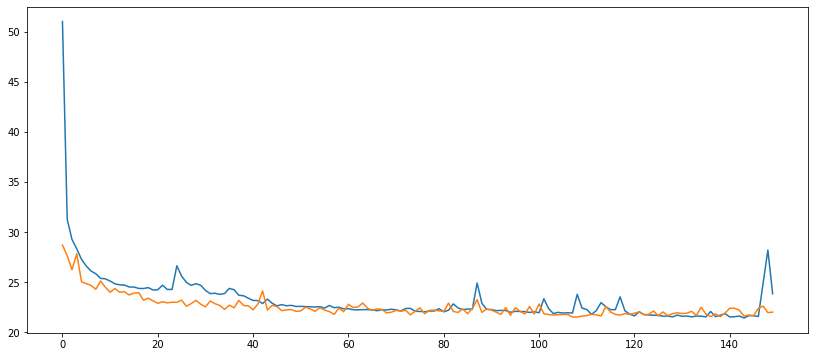

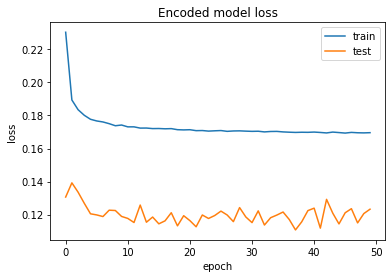

Overall accuracy of Convolutional Neural Network model: 0.9744456733554537


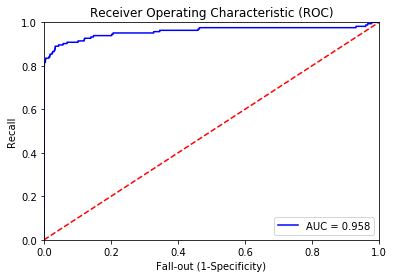

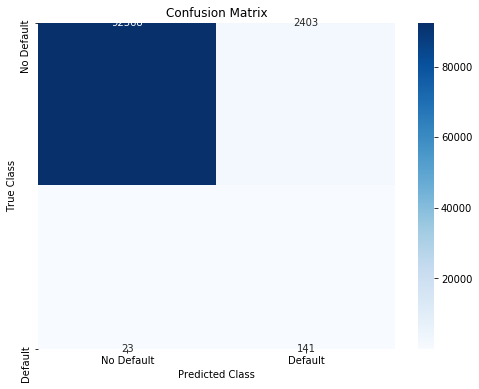

AUC(ROC): 0.9172001198781865
Precision: 0.055424528301886794
Recall: 0.8597560975609756
F1 score: 0.10413589364844904
False positives: 2403
True positives: 141
False negatives: 23
True negatives: 92368


In [27]:
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
#encoding_dim_4 = 20
#encoding_dim_5 = 18
hidden_dim = 15 #size of the hidden layer in encoder and decoder
latent_dim = 2 #number of latent variables to learn
learning_rate = 1e-3

#Cross_Validate

kf = StratifiedKFold(3, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)
    

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = SMOTE()
    X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    sm=KMeansSMOTE()
    
    X_res_train, y_train_res = sm.fit_sample(X_res_train, y_train_res.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    

    input_dim = X_res_train.shape[1]
    x = input_dim

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim_1, activation='tanh',activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_2, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_3, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_4, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_5, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    encoder = Dense(hidden_dim, activation='tanh' , name='encoder_hidden')(encoder)
    encoder = BatchNormalization()(encoder)

    z_mean = Dense(latent_dim, name='z_mean')(encoder)
    z_log_var = Dense(latent_dim, name='z_log_var')(encoder)
    
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, name='z_sampled')([z_mean, z_log_var])
    t = BatchNormalization()(z)

    decoder1 = Dense(hidden_dim, activation='tanh')(t)
    decoder1 = BatchNormalization()(decoder1) 

    #decoder = Dense(encoding_dim_5, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    #decoder = Dense(encoding_dim_4, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_3, activation='tanh')(decoder1)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_2, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_1, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)


    decoded_mean = Dense(input_dim, activation=None, name='decoded_mean')(decoder)


    vae = Model(inputs=input_layer, outputs=decoded_mean)
    
    def rec_loss(y_true, y_pred):
        return K.sum(K.square(y_true - y_pred), axis=-1)

    def kl_loss(y_true, y_pred):
        return - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    def vae_loss(x, decoded_mean):
        rec_loss = K.sum(K.square(x - decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean((rec_loss + kl_loss) / 2)

    vae.compile(optimizer=RMSprop(lr=learning_rate), loss=vae_loss, metrics=[rec_loss, kl_loss])
    vae.summary()
    
    n_epochs = 150
    batch_size = 128

#early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e-5) #stop training if loss does not decrease with at least 0.00001
#reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, min_delta=1e-5, factor=0.2) #reduce learning rate (divide it by 5 = multiply it by 0.2) if loss does not decrease with at least 0.00001

#callbacks = [reduce_lr]

#collect training data in history object
    history = vae.fit(X_res_train, X_res_train, 
                  validation_data=(x_test, x_test),
                  batch_size=batch_size,
                  shuffle = True,
                  epochs=n_epochs,
                  )
    
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    ax.plot(history.history['rec_loss']);
    ax.plot(history.history['val_rec_loss']);
    
    
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, decoder1)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(X_res_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape
    
    #--------------------------------Build new model using encoded data--------------------------

    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train_res, epochs=50,validation_data=(encoded_test_x, y_test), verbose=1)

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    

        #---------------------------------Predictions and visuallizations-----------------------#Predict on test set
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    

    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

      

In [28]:

print("Average tn = " + str(Average(tn_summary)))
print("Average fp = " + str(Average(fp_summary)))
print("Average fn = "+ str(Average(fn_summary)))    
print("Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print("Average Precision = {:0.2f}%".format(Average_precision*100))

print("Average Recall = {:0.2f}%".format(Average_recall*100))

print("Average F1 score = {:0.2f}%".format(Average_f1_score*100))

Average tn = 92347.66666666667
Average fp = 2424.0
Average fn = 19.666666666666668
Average tp = 144.33333333333334
Average Precision = 5.62%
Average Recall = 88.01%
Average F1 score = 10.56%


In [29]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print("Total fp: " + str(total_fp))
print(" Total fn:" + str(total_fn))
print(" Total tp:" + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print("Total Precision = " + str(Total_Precision))
print("Total Recall = " + str(Total_Recall))
print("Total F1_score = " + str(Total_F1_score))
    


 Total tn: 277043
Total fp: 7272
 Total fn:59
 Total tp:433
Total Precision = 0.05619727449707982
Total Recall = 0.8800813008130082
Total F1_score = 0.10564840795412957
